<a href="https://colab.research.google.com/github/Edem-m/JaxProject_Edem-Jaimie/blob/CollabCode/Jaxproject_Edem_Jaimie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
#-----# Install all the Python packages we need for this project----
!pip install -q gseapy pandas numpy scipy matplotlib seaborn

# Import gseapy so we can access MSigDB pathway gene sets
import gseapy as gp

# Import pandas for loading and manipulating tables of data
import pandas as pd

# Import numpy for numerical operations (like log transformations)
import numpy as np

# Import scipy for statistical tests (like t-tests)
import scipy

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for nicer statistical plots
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Print messages to confirm everything imported correctly
print("All imports successful!")
print("gseapy version:", gp.__version__)

All imports successful!
gseapy version: 1.1.11


In [269]:
# Use gseapy to download the MSigDB Hallmark gene sets
# These are curated gene lists that represent core biological pathways
# 'organism="Human"' ensures we get human gene symbols

hallmark = gp.get_library(
    name="MSigDB_Hallmark_2020",
    organism="Human"
)

In [270]:
# Convert the dictionary keys (pathway names) into a list
keys = list(hallmark.keys())

# Print how many Hallmark pathways were loaded
print("Number of Hallmark pathways:", len(keys))

# Print the first 10 pathway names so we can see what they look like
print("First 10 Hallmark pathways:")
print(keys[:10])

Number of Hallmark pathways: 50
First 10 Hallmark pathways:
['TNF-alpha Signaling via NF-kB', 'Hypoxia', 'Cholesterol Homeostasis', 'Mitotic Spindle', 'Wnt-beta Catenin Signaling', 'TGF-beta Signaling', 'IL-6/JAK/STAT3 Signaling', 'DNA Repair', 'G2-M Checkpoint', 'Apoptosis']


In [271]:
print(hallmark)

{'TNF-alpha Signaling via NF-kB': ['MARCKS', 'IL23A', 'NINJ1', 'TNFSF9', 'SIK1', 'ATF3', 'SERPINE1', 'MYC', 'HES1', 'CCN1', 'CCNL1', 'EGR1', 'EGR2', 'EGR3', 'JAG1', 'ABCA1', 'GADD45B', 'GADD45A', 'KLF10', 'PLK2', 'EIF1', 'EHD1', 'FOSL2', 'FOSL1', 'GPR183', 'PLPP3', 'IFIT2', 'ICAM1', 'ZC3H12A', 'IER2', 'IL12B', 'IER5', 'JUNB', 'IER3', 'STAT5A', 'DUSP5', 'EDN1', 'DUSP4', 'JUN', 'DUSP1', 'DUSP2', 'TSC22D1', 'CCL20', 'SPHK1', 'LIF', 'IL18', 'TUBB2A', 'RHOB', 'VEGFA', 'IL1A', 'PTPRE', 'TLR2', 'IL1B', 'BHLHE40', 'CLCF1', 'ID2', 'REL', 'FJX1', 'SGK1', 'BTG3', 'BTG2', 'BTG1', 'SDC4', 'LITAF', 'AREG', 'SOCS3', 'PANX1', 'RIPK2', 'NFIL3', 'SERPINB2', 'GCH1', 'IFNGR2', 'G0S2', 'FOS', 'F3', 'SERPINB8', 'SPSB1', 'FOSB', 'PER1', 'F2RL1', 'HBEGF', 'CD44', 'TRIP10', 'CDKN1A', 'PTGER4', 'PTGS2', 'IFIH1', 'NAMPT', 'OLR1', 'ICOSLG', 'PHLDA1', 'ZBTB10', 'TAP1', 'PNRC1', 'CXCL10', 'CXCL11', 'IL6ST', 'CD69', 'SQSTM1', 'RELA', 'CD83', 'CSF2', 'CSF1', 'CD80', 'PPP1R15A', 'TNC', 'TNF', 'RELB', 'TANK', 'ZFP36', 

In [272]:
df = pd.DataFrame([
    {"Hallmark": k, "NumGenes": len(v), "First40Genes": ", ".join(v[:40])}
    for k, v in hallmark.items()
]).sort_values("NumGenes", ascending=False)

#print(df)

In [273]:
#this takes the dataframe of the hallmarks and put them into a csv file
with open("hallmark_genes.txt", "w") as f:
    for k, genes in hallmark.items():
        f.write(f"{k}\t{','.join(genes)}\n")


df.to_csv("hallmark_summary.csv", index=False)

In [274]:
#-----Uploading the reading from the GSE255403_Read_counts.xlsx file and chekcing the file contect----


#Loading the file and assigning it to the variable read_count
read_count = pd.read_csv("GSE255403_norm_counts_FPKM_GRCh38.p13_NCBI.tsv", sep = '\t')

read_count.head()          # look at the first few rows
read_count.shape           # number of genes × number of samples
read_count.columns[:10]    # first few column names


Index(['GeneID', 'GSM8072033', 'GSM8072034', 'GSM8072036', 'GSM8072037',
       'GSM8072038', 'GSM8072040', 'GSM8072041', 'GSM8072042', 'GSM8072043'],
      dtype='object')

In [275]:


# Example of reading a TSV file using pd.read_csv with a tab separator
# Replace 'your_file.tsv' with the actual path to your TSV file
# df_tsv = pd.read_csv('your_file.tsv', sep='\t')

# Alternatively, you can use pd.read_table(), which defaults to a tab separator
# df_tsv = pd.read_table('your_file.tsv')

#print("Pandas can read .tsv files using pd.read_csv(sep='\\t') or pd.read_table().")

In [276]:
# Reading the meta data

meta_data=pd.read_table("GSE255403_series_matrix.txt",delimiter='\t',skiprows=54)
meta_data.head(10)

,!Sample_title,SMA1,SMA2,SMA3,SMA4,SMA5,SMA6,SMA7,SMA8,SMA9,...,nonSMA33,nonSMA34,nonSMA35,nonSMA36,nonSMA37,nonSMA38,nonSMA39,nonSMA40,nonSMA41,nonSMA24
0,!Sample_geo_accession,GSM8072033,GSM8072034,GSM8072035,GSM8072036,GSM8072037,GSM8072038,GSM8072039,GSM8072040,GSM8072041,...,GSM8072091,GSM8072092,GSM8072093,GSM8072094,GSM8072095,GSM8072096,GSM8072097,GSM8072098,GSM8072099,GSM8135504
1,!Sample_status,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,...,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024,Public on Apr 16 2024
2,!Sample_submission_date,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,...,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Feb 08 2024,Mar 07 2024
3,!Sample_last_update_date,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,...,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Aug 07 2024,Apr 17 2024
4,!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,...,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
5,!Sample_channel_count,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,!Sample_source_name_ch1,blood,blood,blood,blood,blood,blood,blood,blood,blood,...,blood,blood,blood,blood,blood,blood,blood,blood,blood,blood
7,!Sample_organism_ch1,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,...,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens
8,!Sample_characteristics_ch1,Sex: MALE,Sex: MALE,Sex: MALE,Sex: MALE,Sex: MALE,Sex: FEMALE,Sex: FEMALE,Sex: FEMALE,Sex: FEMALE,...,Sex: MALE,Sex: MALE,Sex: MALE,Sex: FEMALE,Sex: FEMALE,Sex: MALE,Sex: MALE,Sex: MALE,Sex: FEMALE,tissue: blood
9,!Sample_characteristics_ch1,genetic variants: HbSS,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAS,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbSS,...,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,genetic variants: HbAA,Sex: FEMALE


In [277]:
# Read the file WITHOUT skipping rows, handling inconsistent column counts
lines = []
with open("GSE255403_series_matrix.txt", "r") as f:
    for line in f:
        lines.append(line.strip().split('\t'))

# Create a DataFrame from the list of lists
raw_df = pd.DataFrame(lines)

# Keep only rows that describe samples
# Ensure the first column is treated as string for .startswith() method
sample_rows = raw_df[raw_df[0].astype(str).str.startswith("!Sample")]

sample_rows.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
54,!Sample_title,"""SMA1""","""SMA2""","""SMA3""","""SMA4""","""SMA5""","""SMA6""","""SMA7""","""SMA8""","""SMA9""",...,"""nonSMA33""","""nonSMA34""","""nonSMA35""","""nonSMA36""","""nonSMA37""","""nonSMA38""","""nonSMA39""","""nonSMA40""","""nonSMA41""","""nonSMA24"""
55,!Sample_geo_accession,"""GSM8072033""","""GSM8072034""","""GSM8072035""","""GSM8072036""","""GSM8072037""","""GSM8072038""","""GSM8072039""","""GSM8072040""","""GSM8072041""",...,"""GSM8072091""","""GSM8072092""","""GSM8072093""","""GSM8072094""","""GSM8072095""","""GSM8072096""","""GSM8072097""","""GSM8072098""","""GSM8072099""","""GSM8135504"""
56,!Sample_status,"""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""",...,"""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024""","""Public on Apr 16 2024"""
57,!Sample_submission_date,"""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""",...,"""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Feb 08 2024""","""Mar 07 2024"""
58,!Sample_last_update_date,"""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""",...,"""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Aug 07 2024""","""Apr 17 2024"""


In [278]:
# Set column 0 (which contains metadata field names like !Sample_title)
# as the index of the DataFrame.
# This allows us to refer to metadata fields by name instead of by row number.
sample_rows = sample_rows.set_index(0)

In [279]:
# Transpose the DataFrame so that:
# - Rows become samples (GSM IDs)
# - Columns become metadata fields
#
# This is the standard format for a metadata table:
# each row = one sample, each column = one attribute of that sample
meta = sample_rows.T

In [280]:
meta.head(66)
#meta.shape
#meta.columns

,!Sample_title,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,...,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_data_row_count,!Sample_instrument_model,!Sample_library_selection,!Sample_library_source,!Sample_library_strategy,!Sample_relation,!Sample_relation,!Sample_supplementary_file_1
1,"""SMA1""","""GSM8072033""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: MALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE"""
2,"""SMA2""","""GSM8072034""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: MALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE"""
3,"""SMA3""","""GSM8072035""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: MALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE"""
4,"""SMA4""","""GSM8072036""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: MALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE"""
5,"""SMA5""","""GSM8072037""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: MALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,"""nonSMA38""","""GSM8072096""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: MALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE"""
63,"""nonSMA39""","""GSM8072097""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: MALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE"""
64,"""nonSMA40""","""GSM8072098""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: MALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE"""
65,"""nonSMA41""","""GSM8072099""","""Public on Apr 16 2024""","""Feb 08 2024""","""Aug 07 2024""","""SRA""","""1""","""blood""","""Homo sapiens""","""Sex: FEMALE""",...,"""87131""","""USA""","""0""","""Illumina NovaSeq 6000""","""cDNA""","""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?ter

In [281]:
# GEO sometimes stores sample characteristics across multiple columns
# (e.g. !Sample_characteristics_ch1, !Sample_characteristics_ch1.1, etc.)
#
# This line finds all columns whose name contains 'Sample_characteristics_ch1'
char_cols = [c for c in meta.columns if "Sample_characteristics_ch1" in str(c)]

In [282]:
# Get the 'sex' row, which is the first row (index 0) in combined_df_no_nan_cols
sex_labels = combined_df_no_nan_cols.loc['sex']

# Select a few example genes for plotting. Let's pick the first 5 actual genes after metadata.
# Ensure these genes exist in the DataFrame's index before selecting.
example_genes = combined_df_no_nan_cols.index[2:7].tolist()

# Filter the DataFrame to include only these example genes and the sex row
# And transpose to have genes as columns and samples as rows
plot_df = combined_df_no_nan_cols.loc[example_genes].T

# Add the sex labels as a column to the plot_df
plot_df['sex'] = sex_labels.values

# Convert gene expression columns to numeric, coercing errors to NaN
# This is important as the DataFrame might contain 'NaN' or other non-numeric values
for col in example_genes:
    plot_df[col] = pd.to_numeric(plot_df[col], errors='coerce')

# Melt the DataFrame to long format for seaborn
melted_df = plot_df.melt(id_vars=['sex'], var_name='Gene', value_name='Expression')

print("Melted DataFrame head for plotting:")
display(melted_df.head())


Melted DataFrame head for plotting:


,sex,Gene,Expression
0,MALE,DDX11L1,0.15540
1,MALE,DDX11L1,0.21000
2,MALE,DDX11L1,0.24460
3,MALE,DDX11L1,0.41400
4,FEMALE,DDX11L1,0.08738


In [283]:
# For each sample (row), combine all characteristics columns into a single string.
# - fillna("") avoids errors from missing values
# - astype(str) ensures everything is treated as text
# - agg(" ; ".join, axis=1) joins values with a separator
#
# Result: one long string per sample containing key:value pairs
chars_series = (
    meta[char_cols]
    .fillna("")
    .astype(str)
    .agg(" ; ".join, axis=1)
)

In [284]:
import re

def extract_kv_pairs(text):
    """
    This function takes a string like:
      'Sex: MALE ; Genotype: HbAS ; Condition: SMA'
    and converts it into a dictionary:
      {'sex': 'MALE', 'genotype': 'HbAS', 'condition': 'SMA'}
    """
    # If the input is not a string, return an empty dictionary
    if not isinstance(text, str):
        return {}

    # Split the text into parts using common separators (; or |)
    parts = re.split(r"\s*[;|]\s*", text.strip())

    out = {}
    for p in parts:
        # First, ensure the part itself is stripped of any outer quotes before matching
        p = p.strip().strip('"')
        if not p:
            continue

        # Match patterns like 'Key: Value' or 'Key = Value'
        m = re.match(r"^\s*([^:=]+?)\s*[:=]\s*(.+?)\s*$", p)
        if not m:
            continue

        # Extract key and value, then remove ALL quotes from them, then strip whitespace
        key = m.group(1).replace('"', '').strip().lower()
        val = m.group(2).replace('"', '').strip()

        # Normalize key name: replace spaces with underscores
        key = re.sub(r"\s+", "_", key)

        out[key] = val

    return out

In [285]:
# Apply the key–value extraction function to each sample's characteristics string
parsed_chars = chars_series.apply(extract_kv_pairs)

# Convert the list of dictionaries into a DataFrame
# Each key becomes a column
chars_df = pd.json_normalize(parsed_chars)

# Make sure the index (sample IDs) matches the metadata table
chars_df.index = meta.index

In [286]:
# Print the column names to see what metadata fields were found
chars_df.columns.tolist()

['sex', 'genetic_variants', 'time', 'tissue']

In [287]:
# Helper function to find a column whose name matches one of the provided patterns.
def pick_col(df, patterns):
    """
    Searches for a column whose name matches one of the provided patterns.
    Returns the first match found, or None if no match exists.
    """
    for col in df.columns:
        for pat in patterns:
            # Ensure robust matching, even if a quote might accidentally slip into column names
            if re.search(pat, col.replace('"', '')):
                return col
    return None

# Identify the appropriate columns for sex, genotype, and condition
# With 'extract_kv_pairs' fixed, columns in chars_df should now be unquoted.
sex_col  = pick_col(chars_df, [r"\bsex\b", r"\bgender\b"])
geno_col = pick_col(chars_df, [r"\bgenotype\b", r"\bhb\b", r"\bsickle\b", r"genetic_variants"])
cond_col = pick_col(chars_df, [r"\bcondition\b", r"\bdisease\b", r"\bdiagnosis\b", r"\bsma\b"])

In [288]:
# Drop columns that contain any NaN values
combined_df_no_nan_cols = combined_df.dropna(axis=1)

print(f"Original DataFrame shape: {combined_df.shape}")
print(f"DataFrame shape after dropping columns with NaN: {combined_df_no_nan_cols.shape}")

print("First 5 rows of the DataFrame after dropping columns with NaN:")
display(combined_df_no_nan_cols.head())

Original DataFrame shape: (39378, 66)
DataFrame shape after dropping columns with NaN: (39378, 41)
First 5 rows of the DataFrame after dropping columns with NaN:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072084,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,MALE,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.9825,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,7.427,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,1.137,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974


In [289]:
# Create a copy of the metadata table so we don't overwrite the original
meta_parsed = meta.copy()

# Add cleaned biological variables if they were found
if sex_col:
    meta_parsed["sex"] = chars_df[sex_col]

if geno_col:
    meta_parsed["genotype"] = chars_df[geno_col]

if cond_col:
    meta_parsed["condition"] = chars_df[cond_col]

In [290]:
# Display the key columns to verify extraction worked

display_cols = []
if "sex" in meta_parsed.columns:
    display_cols.append("sex")
if "genotype" in meta_parsed.columns:
    display_cols.append("genotype")
if "condition" in meta_parsed.columns:
    display_cols.append("condition")

if display_cols:
    meta_parsed[display_cols].head(10)
else:
    print("No relevant columns (sex, genotype, condition) found or extracted.")

# Clean column names in meta_parsed
meta_parsed.columns = [
    c.replace("!Sample_", "").strip('"')
    for c in meta_parsed.columns
]

# Clean values in 'sex' and 'genotype' columns if they exist
if 'sex' in meta_parsed.columns:
    meta_parsed['sex'] = meta_parsed['sex'].str.strip('"')
if 'genotype' in meta_parsed.columns:
    meta_parsed['genotype'] = meta_parsed['genotype'].str.strip('"')

# Rename sample_geo_accession to sample_id
if 'geo_accession' in meta_parsed.columns:
    meta_parsed = meta_parsed.rename(columns={'geo_accession': 'sample_id'})

# Select only relevant metadata columns for further use
# Dynamically check for column existence before selection
final_cols = ['sample_id']
if 'sex' in meta_parsed.columns:
    final_cols.append('sex')
if 'genotype' in meta_parsed.columns:
    final_cols.append('genotype')

metadata = meta_parsed[final_cols].copy()

# Display the cleaned metadata table
metadata.head(66)

,sample_id,sex,genotype
1,"""GSM8072033""",MALE,HbSS
2,"""GSM8072034""",MALE,HbAA
3,"""GSM8072035""",MALE,HbAA
4,"""GSM8072036""",MALE,HbAA
5,"""GSM8072037""",MALE,HbAS
...,...,...,...
62,"""GSM8072096""",MALE,HbAA
63,"""GSM8072097""",MALE,HbAA
64,"""GSM8072098""",MALE,HbAA
65,"""GSM8072099""",FEMALE,HbAA


In [291]:
# Load the annotation file containing GeneIDs and their corresponding gene symbols.
# This file acts as a lookup table to translate numerical GeneIDs into human-readable names.
Human_GRCh38 = pd.read_csv("Human.GRCh38.p13.annot.tsv", sep='\t')

# Create a dictionary to map GeneIDs (keys) to their respective gene Symbols (values).
# This dictionary will be used to efficiently replace the IDs in the read_count DataFrame.
gene_id_to_name_dict = dict(zip(Human_GRCh38['GeneID'], Human_GRCh38['Symbol']))

# Display a snippet of the created dictionary to confirm its structure and content.
print("First 10 entries of the GeneID to GeneName mapping dictionary:")
print(list(gene_id_to_name_dict.items())[:10])

# Replace the numerical 'GeneID' column in the 'read_count' DataFrame with the descriptive gene names.
# This operation uses the previously created dictionary for mapping.
read_count['GeneID'] = read_count['GeneID'].replace(gene_id_to_name_dict)

# Rename the 'GeneID' column to 'GeneName' to reflect the new content.
read_count = read_count.rename(columns={'GeneID': 'GeneName'})

# Display the first few rows of the updated 'read_count' DataFrame.
# This allows for a quick verification that GeneIDs have been successfully replaced by GeneNames.
print("\nFirst 5 rows of read_count DataFrame after mapping GeneIDs to GeneNames:")
display(read_count.head())

/tmp/ipython-input-1091011305.py:3: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Human_GRCh38 = pd.read_csv("Human.GRCh38.p13.annot.tsv", sep='\t')


First 10 entries of the GeneID to GeneName mapping dictionary:
[(100287102, 'DDX11L1'), (653635, 'WASH7P'), (102466751, 'MIR6859-1'), (107985730, 'MIR1302-2HG'), (100302278, 'MIR1302-2'), (645520, 'FAM138A'), (79501, 'OR4F5'), (100996442, 'LOC100996442'), (729737, 'LOC729737'), (102725121, 'DDX11L17')]

First 5 rows of read_count DataFrame after mapping GeneIDs to GeneNames:


,GeneName,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,...,GSM8072084,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099
0,DDX11L1,0.1554,0.21000,0.2446,0.414,0.08738,0.2357,0.14420,0.07562,0.5012,...,0.9825,0.8325,0.13370,0.10640,0.09675,0.1106,0.4439,0.2609,0.3722,0.38760
1,WASH7P,7.3720,9.76200,10.4200,9.743,9.30300,7.0420,3.77000,8.61600,5.8510,...,7.4270,8.6350,9.75900,11.10000,12.56000,9.6050,13.3300,9.8990,8.2730,7.29700
2,MIR6859-1,4.1530,2.83400,4.7530,3.017,3.18400,2.2900,1.75200,7.34900,0.0000,...,1.1370,4.3340,10.83000,4.74000,9.40200,2.6870,5.3920,3.1690,0.0000,2.97400
3,MIR1302-2HG,0.0000,0.07164,0.0000,0.000,0.00000,0.0000,0.05535,0.00000,0.0000,...,0.0000,0.0000,0.06842,0.05447,0.00000,0.0000,0.0000,0.0000,0.0000,0.06265
4,MIR1302-2,0.0000,0.27930,0.1952,0.000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000


In [292]:
metadata['sample_id'] = metadata['sample_id'].str.strip('"')
metadata = metadata.set_index('sample_id')
metadata_t = metadata[['sex', 'genotype']].T

print("Cleaned metadata and created transposed metadata_t:")
display(metadata_t.head())

Cleaned metadata and created transposed metadata_t:


sample_id,GSM8072033,GSM8072034,GSM8072035,GSM8072036,GSM8072037,GSM8072038,GSM8072039,GSM8072040,GSM8072041,GSM8072042,...,GSM8072091,GSM8072092,GSM8072093,GSM8072094,GSM8072095,GSM8072096,GSM8072097,GSM8072098,GSM8072099,GSM8135504
sex,MALE,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,...,MALE,MALE,MALE,FEMALE,FEMALE,MALE,MALE,MALE,FEMALE,FEMALE
genotype,HbSS,HbAA,HbAA,HbAA,HbAS,HbAA,HbAA,HbAA,HbSS,HbAA,...,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA


In [293]:
read_count = read_count.set_index('GeneName')

combined_df = pd.concat([metadata_t, read_count], axis=0)

print("First 5 rows and last 5 rows of the combined DataFrame:")
display(combined_df.head(100))
display(combined_df.tail())

First 5 rows and last 5 rows of the combined DataFrame:


,GSM8072033,GSM8072034,GSM8072035,GSM8072036,GSM8072037,GSM8072038,GSM8072039,GSM8072040,GSM8072041,GSM8072042,...,GSM8072091,GSM8072092,GSM8072093,GSM8072094,GSM8072095,GSM8072096,GSM8072097,GSM8072098,GSM8072099,GSM8135504
sex,MALE,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,...,MALE,MALE,MALE,FEMALE,FEMALE,MALE,MALE,MALE,FEMALE,FEMALE
genotype,HbSS,HbAA,HbAA,HbAA,HbAS,HbAA,HbAA,HbAA,HbSS,HbAA,...,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA
DDX11L1,0.1554,0.21,NaN,0.2446,0.414,0.08738,NaN,0.2357,0.1442,0.07562,...,NaN,0.1106,NaN,0.4439,NaN,NaN,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,NaN,10.42,9.743,9.303,NaN,7.042,3.77,8.616,...,NaN,9.605,NaN,13.33,NaN,NaN,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,NaN,4.753,3.017,3.184,NaN,2.29,1.752,7.349,...,NaN,2.687,NaN,5.392,NaN,NaN,3.169,0.0,2.974,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC35E2B,7.142,12.94,NaN,13.37,12.3,10.35,NaN,6.729,6.862,6.474,...,NaN,6.85,NaN,11.7,NaN,NaN,12.17,8.314,8.397,NaN
MMP23A,0.7934,2.0,NaN,0.8919,0.7549,0.9958,NaN,0.6875,0.5587,0.6894,...,NaN,0.2017,NaN,1.484,NaN,NaN,0.9515,1.765,1.414,NaN
CDK11A,8.324,9.099,NaN,4.804,7.669,9.608,NaN,6.893,3.847,5.611,...,NaN,7.847,NaN,9.017,NaN,NaN,10.26,9.638,8.288,NaN
SLC35E2A,2.529,7.084,NaN,3.422,4.058,4.555,NaN,3.03,2.746,3.236,...,NaN,3.18,NaN,6.047,NaN,NaN,5.589,3.135,4.309,NaN


,GSM8072033,GSM8072034,GSM8072035,GSM8072036,GSM8072037,GSM8072038,GSM8072039,GSM8072040,GSM8072041,GSM8072042,...,GSM8072091,GSM8072092,GSM8072093,GSM8072094,GSM8072095,GSM8072096,GSM8072097,GSM8072098,GSM8072099,GSM8135504
ND6,172.8,1134.0,NaN,1134.0,1753.0,747.7,NaN,737.7,922.9,598.5,...,NaN,644.5,NaN,1379.0,NaN,NaN,701.9,667.2,527.2,NaN
TRNE,110.1,747.4,NaN,767.9,1099.0,526.2,NaN,488.6,471.2,403.8,...,NaN,505.7,NaN,1026.0,NaN,NaN,459.9,369.0,351.2,NaN
CYTB,117.1,1095.0,NaN,1364.0,1125.0,847.4,NaN,984.5,1015.0,959.9,...,NaN,710.8,NaN,1470.0,NaN,NaN,1074.0,1024.0,637.6,NaN
TRNT,28.39,177.0,NaN,56.73,51.81,56.87,NaN,53.09,36.09,68.14,...,NaN,49.83,NaN,48.15,NaN,NaN,29.39,57.77,47.49,NaN
TRNP,24.16,307.2,NaN,147.4,112.6,117.3,NaN,128.2,109.9,161.7,...,NaN,115.5,NaN,147.4,NaN,NaN,59.43,121.2,85.25,NaN


In [294]:
# Save the DataFrame to a CSV file
output_filename = "combined_data_no_nan.csv"
combined_df_no_nan_cols.to_csv(output_filename, index=True)

print(f"DataFrame successfully saved to {output_filename}")

DataFrame successfully saved to combined_data_no_nan.csv


In [295]:
# Next is grouping the genes in the dataframe by the human pathways hallmark.

#Using the hallmark dic, we look for the gene names, and then when we find a
#particular gene belonging to that hallmark, we group that gene into the hallmark.
#For genes that don't belong to any hallmark we non_mark genes


# Then we use these groups for our analysis.

In [296]:
combined_df_no_nan_cols.loc[:, 'Pathway_Label'] = np.nan

print("Added 'Pathway_Label' column initialized to NaN.")
display(combined_df_no_nan_cols.head())

Added 'Pathway_Label' column initialized to NaN.


/tmp/ipython-input-3874276906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_no_nan_cols.loc[:, 'Pathway_Label'] = np.nan


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN


In [297]:
# Drop columns that contain any NaN values
combined_df_no_nan_cols = combined_df.dropna(axis=1).copy()

print(f"Original DataFrame shape: {combined_df.shape}")
print(f"DataFrame shape after dropping columns with NaN: {combined_df_no_nan_cols.shape}")

print("First 5 rows of the DataFrame after dropping columns with NaN:")
display(combined_df_no_nan_cols.head())

Original DataFrame shape: (39378, 66)
DataFrame shape after dropping columns with NaN: (39378, 41)
First 5 rows of the DataFrame after dropping columns with NaN:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072084,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,MALE,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.9825,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,7.427,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,1.137,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974


In [298]:
combined_df_no_nan_cols.loc[:, 'Pathway_Label'] = np.nan

print("Added 'Pathway_Label' column initialized to NaN.")
display(combined_df_no_nan_cols.head())

Added 'Pathway_Label' column initialized to NaN.


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN


In [299]:
gene_to_pathways = {}

# Get all unique gene names from the DataFrame index (excluding 'sex' and 'genotype')
df_genes = combined_df_no_nan_cols.index[2:].tolist()

# Populate the gene_to_pathways dictionary
for pathway_name, genes_in_pathway in hallmark.items():
    for gene in genes_in_pathway:
        if gene in df_genes:
            if gene not in gene_to_pathways:
                gene_to_pathways[gene] = []
            gene_to_pathways[gene].append(pathway_name)

# Update the 'Pathway_Label' column in combined_df_no_nan_cols
# Only consider rows that are actual genes (i.e., not 'sex' or 'genotype')
for gene, pathways in gene_to_pathways.items():
    if gene in combined_df_no_nan_cols.index:
        combined_df_no_nan_cols.loc[gene, 'Pathway_Label'] = ",".join(pathways)


print("Pathway_Label column populated based on Hallmark gene sets.")
display(combined_df_no_nan_cols.head(10)) # Display first 10 rows to show pathway labels


/tmp/ipython-input-2617048876.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TNF-alpha Signaling via NF-kB,Mitotic Spindle,G2-M Checkpoint' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df_no_nan_cols.loc[gene, 'Pathway_Label'] = ",".join(pathways)


Pathway_Label column populated based on Hallmark gene sets.


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN
MIR1302-2HG,0.0,0.07164,0.0,0.0,0.0,0.0,0.05535,0.0,0.0,0.0,...,0.0,0.06842,0.05447,0.0,0.0,0.0,0.0,0.0,0.06265,NaN
MIR1302-2,0.0,0.2793,0.1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
FAM138A,0.1363,0.1023,0.02384,0.06053,0.06387,0.0,0.0527,0.0,0.0,0.07975,...,0.0,0.03257,0.02593,0.0,0.0,0.1082,0.0,0.0,0.0,NaN
OR4F5,0.0,0.04199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1605,0.1604,0.03192,0.0,0.0,0.0,0.0,0.0,0.0,NaN
LOC100996442,0.7344,1.733,3.677,2.795,0.7374,1.591,0.2069,2.17,3.426,1.252,...,2.579,2.828,1.054,2.874,3.659,1.898,3.743,4.222,2.08,NaN


In [300]:
gene_to_pathways = {}

# Get all unique gene names from the DataFrame index (excluding 'sex' and 'genotype')
df_genes = combined_df_no_nan_cols.index[2:].tolist()

# Populate the gene_to_pathways dictionary
for pathway_name, genes_in_pathway in hallmark.items():
    for gene in genes_in_pathway:
        if gene in df_genes:
            if gene not in gene_to_pathways:
                gene_to_pathways[gene] = []
            gene_to_pathways[gene].append(pathway_name)

# Explicitly cast 'Pathway_Label' column to object dtype to avoid FutureWarning
combined_df_no_nan_cols.loc[:, 'Pathway_Label'] = combined_df_no_nan_cols.loc[:, 'Pathway_Label'].astype(object)

# Update the 'Pathway_Label' column in combined_df_no_nan_cols
# Only consider rows that are actual genes (i.e., not 'sex' or 'genotype')
for gene, pathways in gene_to_pathways.items():
    if gene in combined_df_no_nan_cols.index:
        combined_df_no_nan_cols.loc[gene, 'Pathway_Label'] = ",".join(pathways)


print("Pathway_Label column populated based on Hallmark gene sets.")
display(combined_df_no_nan_cols.head(10)) # Display first 10 rows to show pathway labels

Pathway_Label column populated based on Hallmark gene sets.


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
MIR6859-1,4.153,2.834,4.753,3.017,3.184,2.29,1.752,7.349,0.0,1.325,...,4.334,10.83,4.74,9.402,2.687,5.392,3.169,0.0,2.974,NaN
MIR1302-2HG,0.0,0.07164,0.0,0.0,0.0,0.0,0.05535,0.0,0.0,0.0,...,0.0,0.06842,0.05447,0.0,0.0,0.0,0.0,0.0,0.06265,NaN
MIR1302-2,0.0,0.2793,0.1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
FAM138A,0.1363,0.1023,0.02384,0.06053,0.06387,0.0,0.0527,0.0,0.0,0.07975,...,0.0,0.03257,0.02593,0.0,0.0,0.1082,0.0,0.0,0.0,NaN
OR4F5,0.0,0.04199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1605,0.1604,0.03192,0.0,0.0,0.0,0.0,0.0,0.0,NaN
LOC100996442,0.7344,1.733,3.677,2.795,0.7374,1.591,0.2069,2.17,3.426,1.252,...,2.579,2.828,1.054,2.874,3.659,1.898,3.743,4.222,2.08,NaN


In [301]:
print("Displaying first 5 rows with Pathway_Label populated (if any):")
display(combined_df_no_nan_cols[combined_df_no_nan_cols['Pathway_Label'].notna()].head(100))

Displaying first 5 rows with Pathway_Label populated (if any):


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
ISG15,6090.0,13.43,7.146,22.55,22.66,637.2,75.17,178.3,19.5,22.42,...,17.89,53.74,72.64,84.06,74.57,14.39,216.7,61.4,131.8,"Interferon Alpha Response,Interferon Gamma Res..."
AGRN,3.216,0.4601,0.5767,0.2777,0.2664,0.7952,0.3884,0.6149,0.2547,0.316,...,0.1994,0.385,0.5517,0.6293,0.3597,0.3459,1.028,0.3178,0.3815,"Myogenesis,Glycolysis"
TNFRSF18,1.39,0.7216,0.4166,0.7794,2.673,1.299,0.3151,2.695,0.337,1.339,...,0.6397,0.6142,1.372,0.6505,0.3718,1.691,0.7236,0.8009,1.043,IL-2/STAT5 Signaling
TNFRSF4,0.6853,0.9345,0.6017,0.5962,3.283,0.5302,0.3893,0.7487,0.8458,0.6014,...,0.4683,1.314,1.046,0.9143,0.8461,1.964,1.115,0.6701,0.9365,IL-2/STAT5 Signaling
B3GALT6,1.904,5.057,3.111,2.56,6.253,3.081,2.484,4.32,1.845,3.406,...,2.627,4.016,4.325,3.818,2.866,4.357,4.379,1.622,3.845,"Hypoxia,Glycolysis"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEKT2,0.04116,0.1442,0.0144,0.0,0.01929,0.1665,0.0,0.0,0.0,0.02408,...,0.0,0.0,0.01566,0.08543,0.09765,0.1307,0.05759,0.06573,0.01801,Spermatogenesis
COL8A2,0.3663,0.2928,0.7237,0.1267,0.3143,0.1587,0.1324,0.5092,0.1151,0.2254,...,0.273,0.2592,0.2335,0.3554,0.1354,0.3171,0.3394,0.06837,0.2623,Epithelial Mesenchymal Transition
MRPS15,12.31,21.72,14.05,9.617,35.97,18.46,11.5,15.99,8.906,14.99,...,20.98,23.25,26.14,22.47,15.15,15.52,19.22,13.16,18.99,Oxidative Phosphorylation
CSF3R,141.1,93.85,767.3,203.8,107.0,166.0,43.14,245.0,406.5,185.9,...,224.2,190.0,77.02,166.9,237.7,237.6,329.5,493.4,392.0,"IL-6/JAK/STAT3 Signaling,Inflammatory Response"


In [302]:
output_filename = "annotedpathway.csv"
combined_df_no_nan_cols.to_csv(output_filename, index=True)

print(f"DataFrame successfully saved to {output_filename}")

DataFrame successfully saved to annotedpathway.csv


In [303]:
# Display a slice of combined_df_final focusing on gene rows
# The gene data starts after the 'title', 'sex', and 'genotype' rows (index 3 onwards)
print("Displaying rows from combined_df_final where 'Pathway_Label' is expected to be populated:")
display(combined_df_final[combined_df_final['Pathway_Label'].notna()].head(10))

Displaying rows from combined_df_final where 'Pathway_Label' is expected to be populated:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
ISG15,6090.0,13.43,7.146,22.55,22.66,637.2,75.17,178.3,19.5,22.42,...,17.89,53.74,72.64,84.06,74.57,14.39,216.7,61.4,131.8,"Interferon Alpha Response,Interferon Gamma Res..."
AGRN,3.216,0.4601,0.5767,0.2777,0.2664,0.7952,0.3884,0.6149,0.2547,0.316,...,0.1994,0.385,0.5517,0.6293,0.3597,0.3459,1.028,0.3178,0.3815,"Myogenesis,Glycolysis"
TNFRSF18,1.39,0.7216,0.4166,0.7794,2.673,1.299,0.3151,2.695,0.337,1.339,...,0.6397,0.6142,1.372,0.6505,0.3718,1.691,0.7236,0.8009,1.043,IL-2/STAT5 Signaling
TNFRSF4,0.6853,0.9345,0.6017,0.5962,3.283,0.5302,0.3893,0.7487,0.8458,0.6014,...,0.4683,1.314,1.046,0.9143,0.8461,1.964,1.115,0.6701,0.9365,IL-2/STAT5 Signaling
B3GALT6,1.904,5.057,3.111,2.56,6.253,3.081,2.484,4.32,1.845,3.406,...,2.627,4.016,4.325,3.818,2.866,4.357,4.379,1.622,3.845,"Hypoxia,Glycolysis"
SKI,2.042,4.868,8.256,5.738,4.454,2.421,4.003,5.828,2.489,7.235,...,3.086,3.072,3.19,6.185,3.089,5.006,4.17,3.002,2.258,TGF-beta Signaling
RER1,10.6,14.3,11.69,9.712,19.9,12.29,6.284,17.29,13.4,13.01,...,12.7,16.92,16.56,11.82,12.37,12.71,13.68,9.261,18.73,Protein Secretion
WRAP73,6.597,9.02,10.5,5.16,13.34,6.683,2.996,11.0,7.696,4.508,...,8.996,10.2,9.693,6.641,7.892,7.15,11.22,4.438,10.67,p53 Pathway
RPL22,16.96,73.99,35.52,33.52,82.98,44.92,27.57,30.73,34.65,36.34,...,54.5,57.35,81.44,44.98,38.56,36.59,38.69,26.44,65.69,Myc Targets V1
VAMP3,21.77,24.29,33.65,28.62,38.24,45.16,8.058,28.54,32.49,23.07,...,42.45,38.94,29.56,30.62,27.29,38.14,37.03,45.67,52.71,Protein Secretion


In [304]:
# 3. Add the 'title' row from sample_info to the top

# We need the 'title' information, which is present in `meta_parsed`. (`metadata` no longer has 'title' as a column).
# Create a Series mapping unquoted sample_id to unquoted title.
title_mapping = meta_parsed.set_index(meta_parsed['sample_id'].str.strip('"'))['title'].str.strip('"')

# Get the sample IDs that are columns in combined_df_no_nan_cols.
# These are the columns for which we need title information.
data_sample_cols = [col for col in combined_df_no_nan_cols.columns if col != 'Pathway_Label']

# Create a DataFrame for the title row, ensuring it only contains relevant sample IDs
# and is transposed to be a single row with sample IDs as columns.
title_row_df = title_mapping.loc[data_sample_cols].to_frame().T
title_row_df.index = ['title'] # Set the index name for the new row

# Ensure title_row_df has the 'Pathway_Label' column (with NaN) and the same column order
# as the combined_df_no_nan_cols (which will become combined_df_final later).
title_row_df['Pathway_Label'] = np.nan

# Prepare combined_df_final by ensuring column order.
# The `combined_df_no_nan_cols` already has the correct sample columns and `Pathway_Label`.
# We just need to ensure `title_row_df` has the same column order before concatenation.
final_column_order = data_sample_cols + ['Pathway_Label']
title_row_df = title_row_df[final_column_order] # Reorder columns of title_row_df

# Concatenate the 'title' row at the very top with combined_df_no_nan_cols
combined_df_final = pd.concat([title_row_df, combined_df_no_nan_cols], axis=0)

print("Final Combined DataFrame with 'title' row at the top and Pathway_Label for genes:")
display(combined_df_final.head(100))

Final Combined DataFrame with 'title' row at the top and Pathway_Label for genes:


,GSM8072033,GSM8072034,GSM8072036,GSM8072037,GSM8072038,GSM8072040,GSM8072041,GSM8072042,GSM8072043,GSM8072046,...,GSM8072085,GSM8072086,GSM8072088,GSM8072089,GSM8072092,GSM8072094,GSM8072097,GSM8072098,GSM8072099,Pathway_Label
title,SMA1,SMA2,SMA4,SMA5,SMA6,SMA8,SMA9,SMA10,SMA11,SMA14,...,nonSMA27,nonSMA28,nonSMA30,nonSMA31,nonSMA34,nonSMA36,nonSMA39,nonSMA40,nonSMA41,NaN
sex,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,MALE,MALE,FEMALE,NaN
genotype,HbSS,HbAA,HbAA,HbAS,HbAA,HbAA,HbSS,HbAA,HbAA,HbAA,...,HbAS,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,HbAA,NaN
DDX11L1,0.1554,0.21,0.2446,0.414,0.08738,0.2357,0.1442,0.07562,0.5012,0.1637,...,0.8325,0.1337,0.1064,0.09675,0.1106,0.4439,0.2609,0.3722,0.3876,NaN
WASH7P,7.372,9.762,10.42,9.743,9.303,7.042,3.77,8.616,5.851,5.349,...,8.635,9.759,11.1,12.56,9.605,13.33,9.899,8.273,7.297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDK11B,5.901,6.767,5.748,4.609,6.245,5.604,3.201,4.553,4.792,5.422,...,5.291,5.56,6.058,5.275,4.941,6.191,7.039,5.356,6.697,NaN
SLC35E2B,7.142,12.94,13.37,12.3,10.35,6.729,6.862,6.474,8.9,8.453,...,9.286,10.81,9.18,10.06,6.85,11.7,12.17,8.314,8.397,NaN
MMP23A,0.7934,2.0,0.8919,0.7549,0.9958,0.6875,0.5587,0.6894,0.9139,0.5471,...,0.8674,0.5282,1.067,0.5292,0.2017,1.484,0.9515,1.765,1.414,NaN
CDK11A,8.324,9.099,4.804,7.669,9.608,6.893,3.847,5.611,6.719,6.545,...,6.876,5.853,7.34,7.599,7.847,9.017,10.26,9.638,8.288,NaN


In [305]:
output_filename = "combined_df_final.csv"
combined_df_final.to_csv(output_filename, index=True)

print(f"DataFrame successfully saved to {output_filename}")

DataFrame successfully saved to combined_df_final.csv


In [306]:
target_pathways = [
    'Inflammatory Response',
    'Interferon Alpha Response',
    'Interferon Gamma Response',
    'TNF-alpha Signaling via NF-kB',
    'IL-6/JAK/STAT3 Signaling',
    'IL2-STAT5 Signaling'
]

# Filter for gene rows and where 'Pathway_Label' contains any of the target pathways
# Use .loc to avoid SettingWithCopyWarning
filtered_genes_df = combined_df_final.loc[
    (combined_df_final.index != 'title') &
    (combined_df_final.index != 'sex') &
    (combined_df_final.index != 'genotype') &
    (combined_df_final['Pathway_Label'].fillna('').astype(str).str.contains('|'.join(target_pathways)))
].copy()

# Extract 'title', 'sex' and 'genotype' rows
title_row = combined_df_final.loc[['title']]
sex_row = combined_df_final.loc[['sex']]
genotype_row = combined_df_final.loc[['genotype']]

# Concatenate the metadata rows and the filtered gene rows
# Ensure column order is maintained if necessary, but here we just concatenate rows
pathway_filtered_df = pd.concat([title_row, sex_row, genotype_row, filtered_genes_df], axis=0)

print("DataFrame filtered by target pathways (first 5 rows):")
#display(pathway_filtered_df.head(10))
print(f"Shape of the filtered DataFrame: {pathway_filtered_df.shape}")

DataFrame filtered by target pathways (first 5 rows):
Shape of the filtered DataFrame: (565, 42)


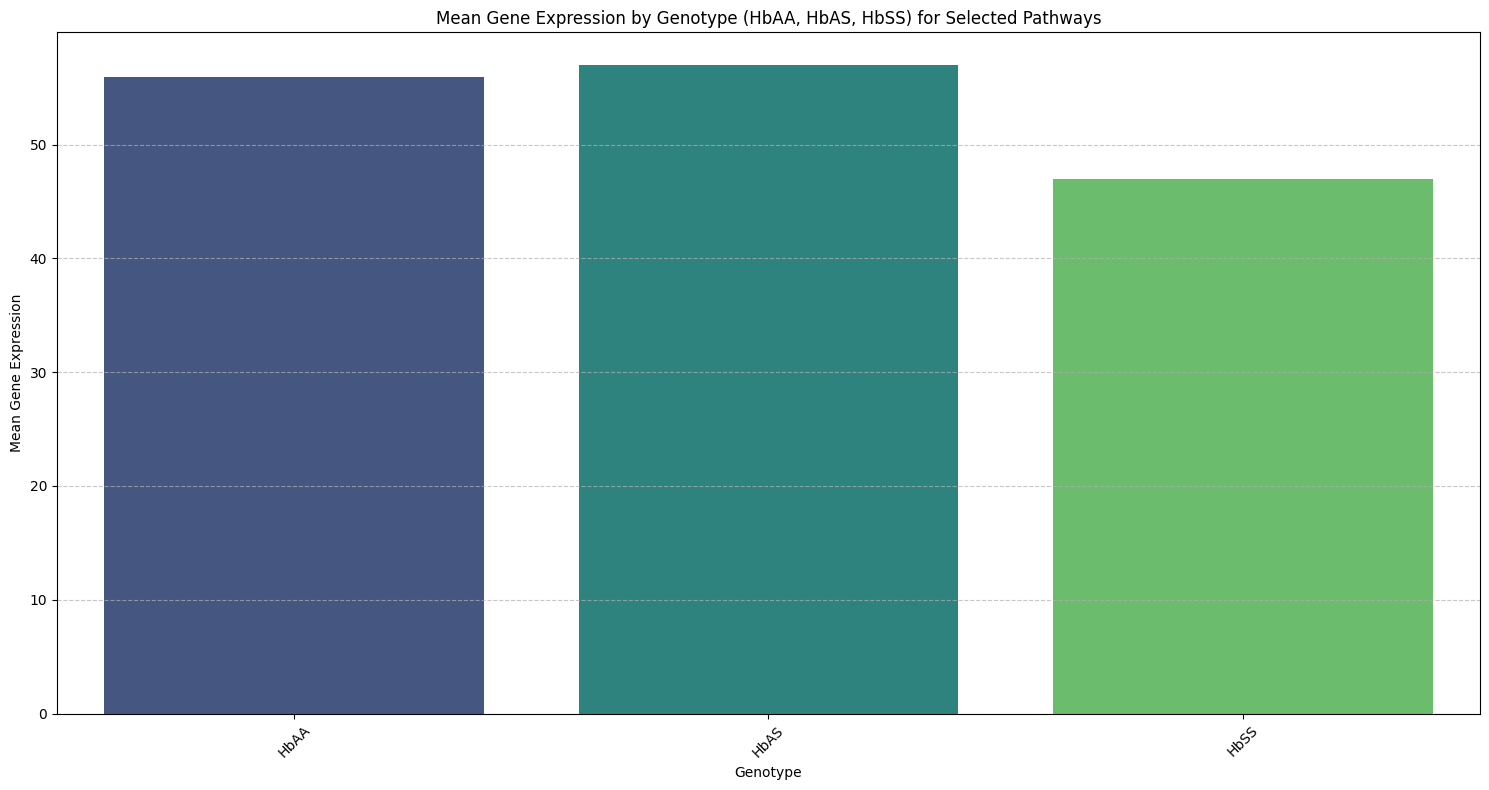

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

# --- Use existing DataFrames directly, avoiding re-reconstruction ---
# Assuming combined_df_final and metadata are correctly populated from previous cells.
# This cell will now directly use the `combined_df_final` and `metadata` objects
# that should already be in memory from preceding successful cell executions.

# Ensure 'hallmark' dictionary is available
# (It should be from earlier cell execution, but included here for robustness)
# Using `gp.get_library` to ensure it's available
hallmark = gp.get_library(
    name="MSigDB_Hallmark_2020",
    organism="Human"
)

# Extract genotype info for each sample using the already cleaned 'metadata' DataFrame
sample_genotypes = metadata['genotype']

# Define target pathways
target_pathways = [
    'Inflammatory Response',
    'Interferon Alpha Response',
    'Interferon Gamma Response',
    'TNF-alpha Signaling via NF-kB',
    'IL-6/JAK/STAT3 Signaling',
    'IL2-STAT5 Signaling'
]

# Filter for gene rows and where 'Pathway_Label' contains any of the target pathways
# Ensure all columns (including sample data) are kept
filtered_genes_df = combined_df_final.loc[
    (combined_df_final.index != 'title') &
    (combined_df_final.index != 'sex') &
    (combined_df_final.index != 'genotype') &
    (combined_df_final['Pathway_Label'].fillna('').astype(str).str.contains('|'.join(target_pathways)))
].copy()

# Extract 'title', 'sex' and 'genotype' rows from the combined_df_final
title_row = combined_df_final.loc[['title']]
sex_row = combined_df_final.loc[['sex']]
genotype_row = combined_df_final.loc[['genotype']]

# Concatenate the metadata rows and the filtered gene rows
pathway_filtered_df = pd.concat([title_row, sex_row, genotype_row, filtered_genes_df], axis=0)

# Get the sample IDs that are columns in pathway_filtered_df (excluding 'Pathway_Label')
data_columns = [col for col in pathway_filtered_df.columns if col != 'Pathway_Label']

# Filter sample_genotypes to only include samples present in pathway_filtered_df's data columns
relevant_genotypes = sample_genotypes.loc[data_columns]

# Prepare data for plotting
# Identify gene rows (excluding all metadata rows)
gene_expression_df = pathway_filtered_df.loc[
    ~pathway_filtered_df.index.isin(['title', 'sex', 'genotype'])
]

# Drop the 'Pathway_Label' column from the gene expression data before transposing
gene_expression_df_numerical = gene_expression_df.drop(columns=['Pathway_Label'])

# Transpose the numerical gene expression data
gene_expression_transposed = gene_expression_df_numerical.T
gene_expression_transposed.columns.name = 'Gene' # Name the columns index

# Add the genotype to the transposed dataframe
gene_expression_transposed['genotype'] = relevant_genotypes

# Melt the DataFrame for plotting
melted_df_for_boxplot_genotype = gene_expression_transposed.melt(
    id_vars=['genotype'],
    var_name='Gene',
    value_name='Expression'
)

# Convert expression to numeric, coercing errors
melted_df_for_boxplot_genotype['Expression'] = pd.to_numeric(melted_df_for_boxplot_genotype['Expression'], errors='coerce')

# Drop NaN expression values that might result from coercion
melted_df_for_boxplot_genotype = melted_df_for_boxplot_genotype.dropna(subset=['Expression'])

# Calculate mean expression for each genotype for the bar plot
mean_expression_by_genotype = melted_df_for_boxplot_genotype.groupby('genotype')['Expression'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='genotype', y='Expression', hue='genotype', data=mean_expression_by_genotype, palette='viridis', legend=False)
plt.title('Mean Gene Expression by Genotype (HbAA, HbAS, HbSS) for Selected Pathways')
plt.xlabel('Genotype')
plt.ylabel('Mean Gene Expression')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

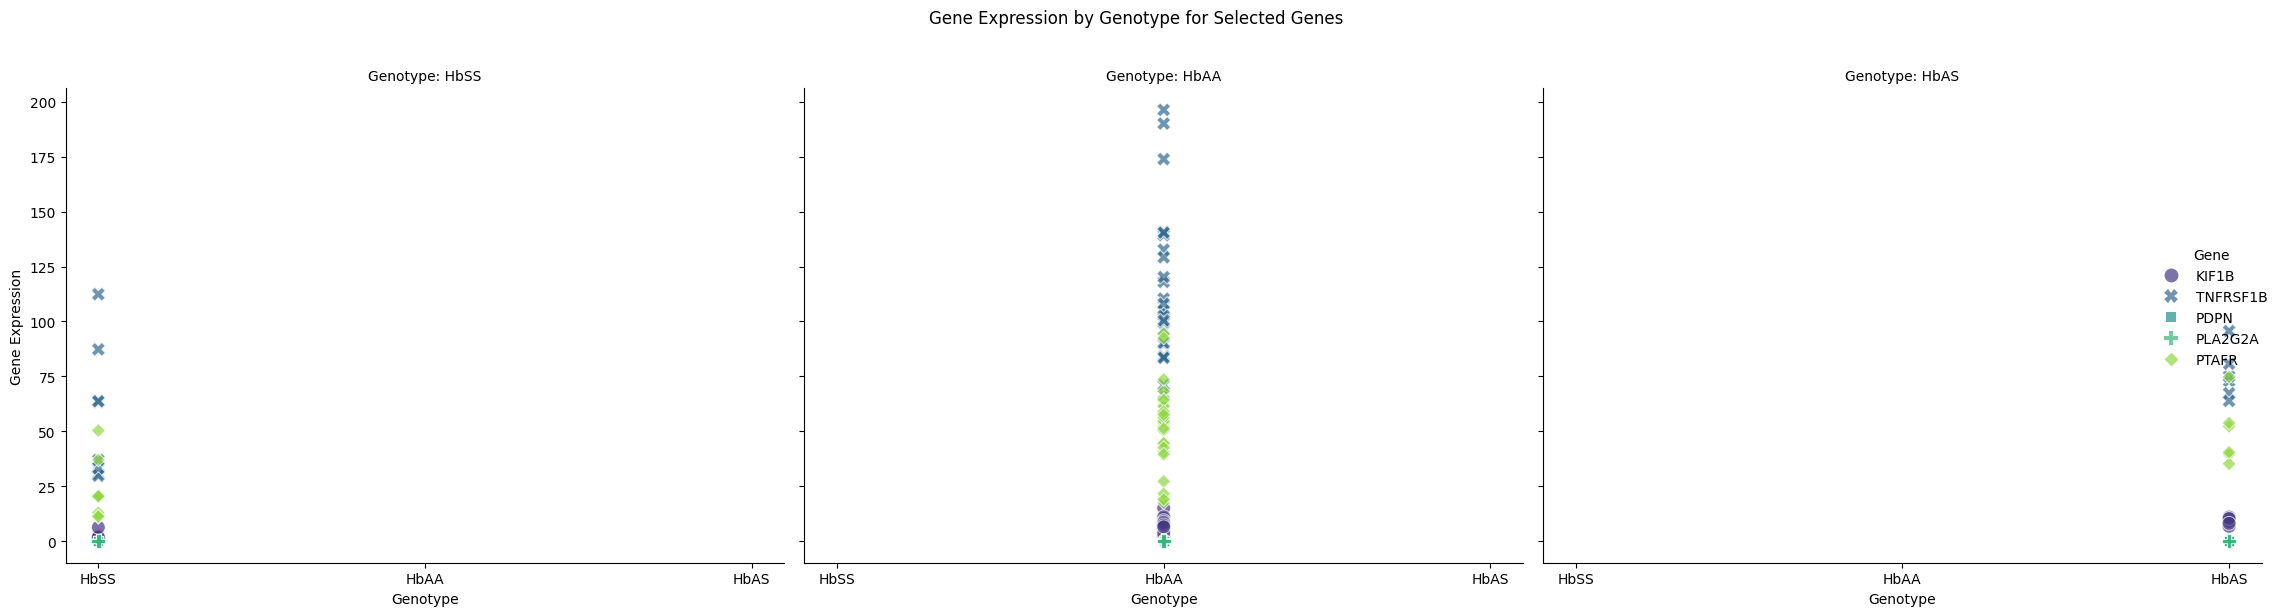

In [313]:
# Select a few representative genes for the scatter plot
# We'll pick the first 5 genes from the filtered list (adjust as needed)
example_genes_for_scatter = filtered_genes_df.index[3:8].tolist()

# Filter the melted DataFrame to include only these selected genes
scatter_df = melted_df_for_boxplot_genotype[
    melted_df_for_boxplot_genotype['Gene'].isin(example_genes_for_scatter)
].copy()

# Create the faceted scatter plot
g = sns.relplot(
    data=scatter_df,
    x='genotype', # We can use genotype on x-axis, and relplot will add jitter for samples
    y='Expression',
    hue='Gene',    # Color by Gene
    style='Gene',  # Shape by Gene
    col='genotype', # Create separate columns for each genotype
    kind='scatter',
    s=100,         # Size of points
    alpha=0.7,     # Transparency
    palette='viridis', # Color palette for hue
    height=6, aspect=1.2 # Adjust plot size
)

g.set_axis_labels("Genotype", "Gene Expression")
g.set_titles("Genotype: {col_name}")
plt.suptitle('Gene Expression by Genotype for Selected Genes', y=1.02) # Add a super title
plt.tight_layout()
plt.show()

In [310]:
# 1. Create a gene to Pathway_Label mapping from filtered_genes_df
gene_pathway_map = filtered_genes_df['Pathway_Label'].to_dict()

# 2. Add 'Pathway_Label' column to the melted DataFrame
melted_df_with_pathways = melted_df_for_boxplot_genotype.copy()
melted_df_with_pathways['Pathway_Label'] = melted_df_with_pathways['Gene'].map(gene_pathway_map)

# 3. Handle genes that might not have a Pathway_Label (e.g., if filtered_genes_df was incomplete)
melted_df_with_pathways = melted_df_with_pathways.dropna(subset=['Pathway_Label']).copy()

# 4. Split the comma-separated pathways and explode the DataFrame
melted_df_with_pathways['Pathway'] = melted_df_with_pathways['Pathway_Label'].str.split(',')
df_exploded = melted_df_with_pathways.explode('Pathway')

# 5. Clean up any whitespace around pathway names
df_exploded['Pathway'] = df_exploded['Pathway'].str.strip()

# 6. Filter to only include the target pathways (redundant but good for robustness)
df_exploded = df_exploded[df_exploded['Pathway'].isin(target_pathways)].copy()

# 7. Calculate the mean expression for each Pathway and genotype
heatmap_data = df_exploded.groupby(['Pathway', 'genotype'])['Expression'].mean().unstack()

# Ensure the pathways are in a consistent order for plotting
heatmap_data = heatmap_data.reindex(target_pathways, axis=0).dropna(how='all')

print("Mean expression per pathway per genotype for heatmap:")
display(heatmap_data)

Mean expression per pathway per genotype for heatmap:


genotype,HbAA,HbAS,HbSS
Pathway,,,
Inflammatory Response,43.004370,45.992727,22.734170
Interferon Alpha Response,127.524728,137.243716,131.037915
Interferon Gamma Response,86.768686,87.578181,85.148447
TNF-alpha Signaling via NF-kB,36.364863,38.177311,24.606758
IL-6/JAK/STAT3 Signaling,42.280334,40.887961,26.197870


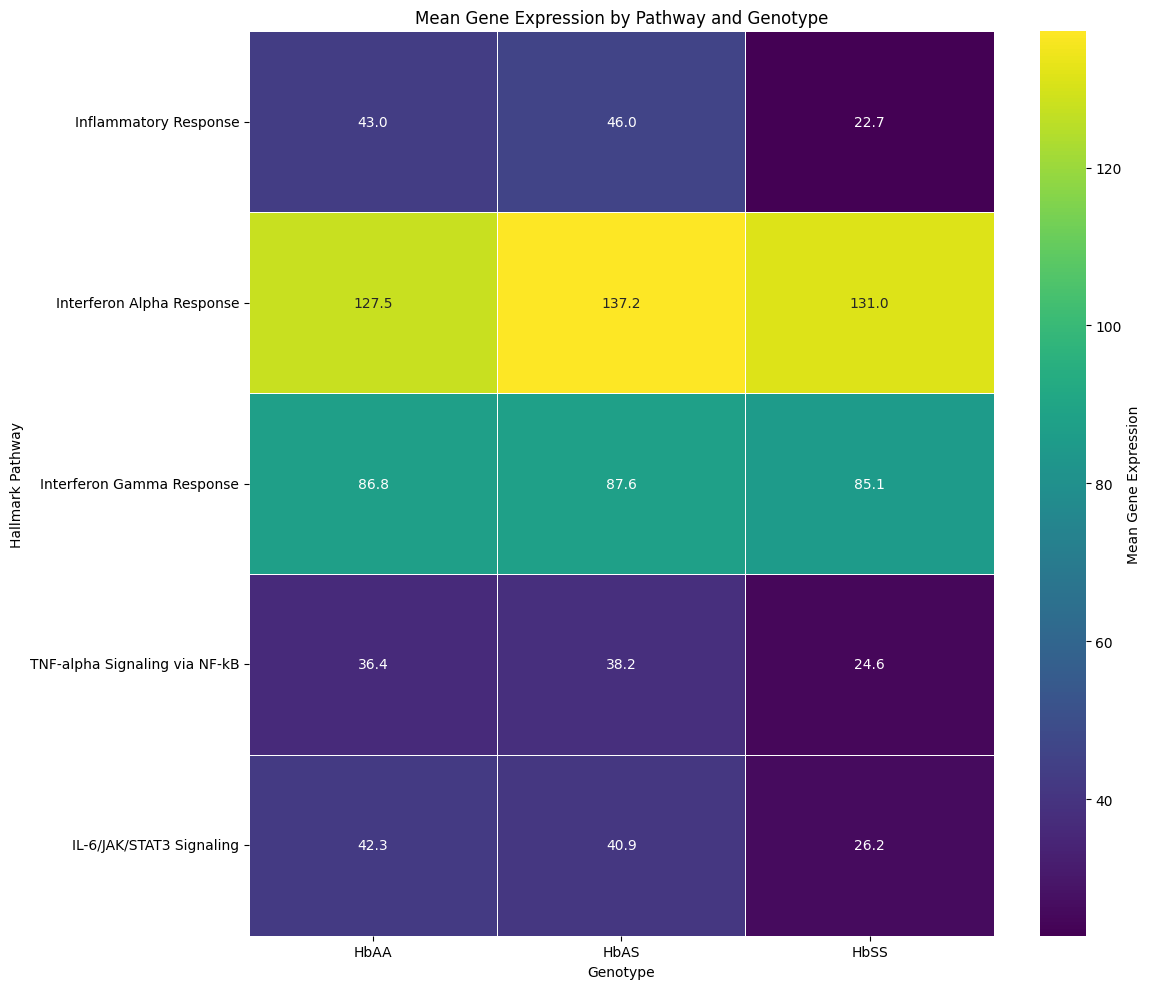

In [312]:
# 8. Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data,
    cmap='viridis', # Changed to a colorblind-friendly colormap
    annot=True,     # Show the values on the heatmap
    fmt=".1f",      # Format annotation to one decimal place
    linewidths=.5,  # Add lines between cells
    cbar_kws={'label': 'Mean Gene Expression'}
)
plt.title('Mean Gene Expression by Pathway and Genotype')
plt.xlabel('Genotype')
plt.ylabel('Hallmark Pathway')
plt.tight_layout()
plt.show()

In [314]:
from sklearn.preprocessing import StandardScaler

# 1. Extract numerical gene expression data
# Exclude 'title', 'sex', 'genotype' rows and 'Pathway_Label' column
gene_expression_all = combined_df_final.loc[
    ~combined_df_final.index.isin(['title', 'sex', 'genotype']) # Select gene rows
].drop(columns=['Pathway_Label']).copy() # Drop Pathway_Label column

# Convert all values to numeric, coercing errors to NaN
gene_expression_all = gene_expression_all.apply(pd.to_numeric, errors='coerce')

# Drop any rows (genes) or columns (samples) that are now entirely NaN
gene_expression_all = gene_expression_all.dropna(axis=0, how='all')
gene_expression_all = gene_expression_all.dropna(axis=1, how='all')

# Transpose the DataFrame: genes as rows, samples as columns (standard for heatmap)
gene_expression_all = gene_expression_all.T

# Get sample genotypes for annotation
sample_genotypes_heatmap = metadata.loc[gene_expression_all.index, 'genotype']

# Perform Z-score standardization on the gene expression data
# This scales data to have mean 0 and standard deviation 1, which is good for heatmaps
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gene_expression_all)
scaled_gene_expression_df = pd.DataFrame(
    scaled_data,
    index=gene_expression_all.index,
    columns=gene_expression_all.columns
)

# Display the shape of the scaled data
print(f"Shape of scaled gene expression data: {scaled_gene_expression_df.shape}")

# For visualization, let's select a subset of genes for the heatmap
# (e.g., the first 50 genes) to keep it readable.
# Plotting all ~10,000+ genes at once will be too dense.
# If you want to visualize all, we might need a different approach (e.g., interactive plots or clustering).
subset_genes_for_heatmap = scaled_gene_expression_df.iloc[:, :50]

print("First 5 rows of scaled gene expression data (subset for heatmap):")
display(subset_genes_for_heatmap.head())

Shape of scaled gene expression data: (41, 39376)
First 5 rows of scaled gene expression data (subset for heatmap):


,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4F5,LOC100996442,LOC729737,DDX11L17,...,ISG15,AGRN,LOC100288175,LOC112267874,LOC105378948,RNF223,C1orf159,LINC01342,MIR200B,MIR200A
GSM8072033,-0.543723,-0.385303,0.424568,-0.553479,-0.232051,1.134167,-0.465232,-1.123953,-0.878545,0.072352,...,5.994371,5.037227,-0.437640,-0.152249,-0.918552,-0.533603,-0.751755,-0.992344,-0.217431,-0.257518
GSM8072034,-0.366170,0.731635,-0.176227,0.849572,1.169102,0.695735,0.364902,-0.212308,-0.358699,-0.547263,...,-0.325401,-0.162159,1.267391,0.344805,1.051548,2.851973,1.573330,0.748167,-0.217431,-0.257518
GSM8072036,-0.253655,1.039143,0.697864,-0.553479,0.747201,-0.316011,-0.465232,1.562414,3.052736,-0.176362,...,-0.331936,0.057823,0.132549,0.589853,1.315275,-0.533603,0.691190,-0.204195,-0.217431,-0.257518
GSM8072037,0.297213,0.722755,-0.092872,-0.553479,-0.232051,0.157109,-0.465232,0.757216,-0.349727,-0.025855,...,-0.315916,-0.506282,2.233391,0.176975,0.597091,-0.533603,-0.381492,0.538099,-0.217431,-0.257518
GSM8072038,-0.764916,0.517127,-0.016804,-0.553479,-0.232051,0.200178,-0.465232,-1.121214,-0.745722,-0.531048,...,-0.315802,-0.527601,0.739643,0.482199,-0.026120,-0.533603,1.380435,-0.418105,-0.217431,-0.257518


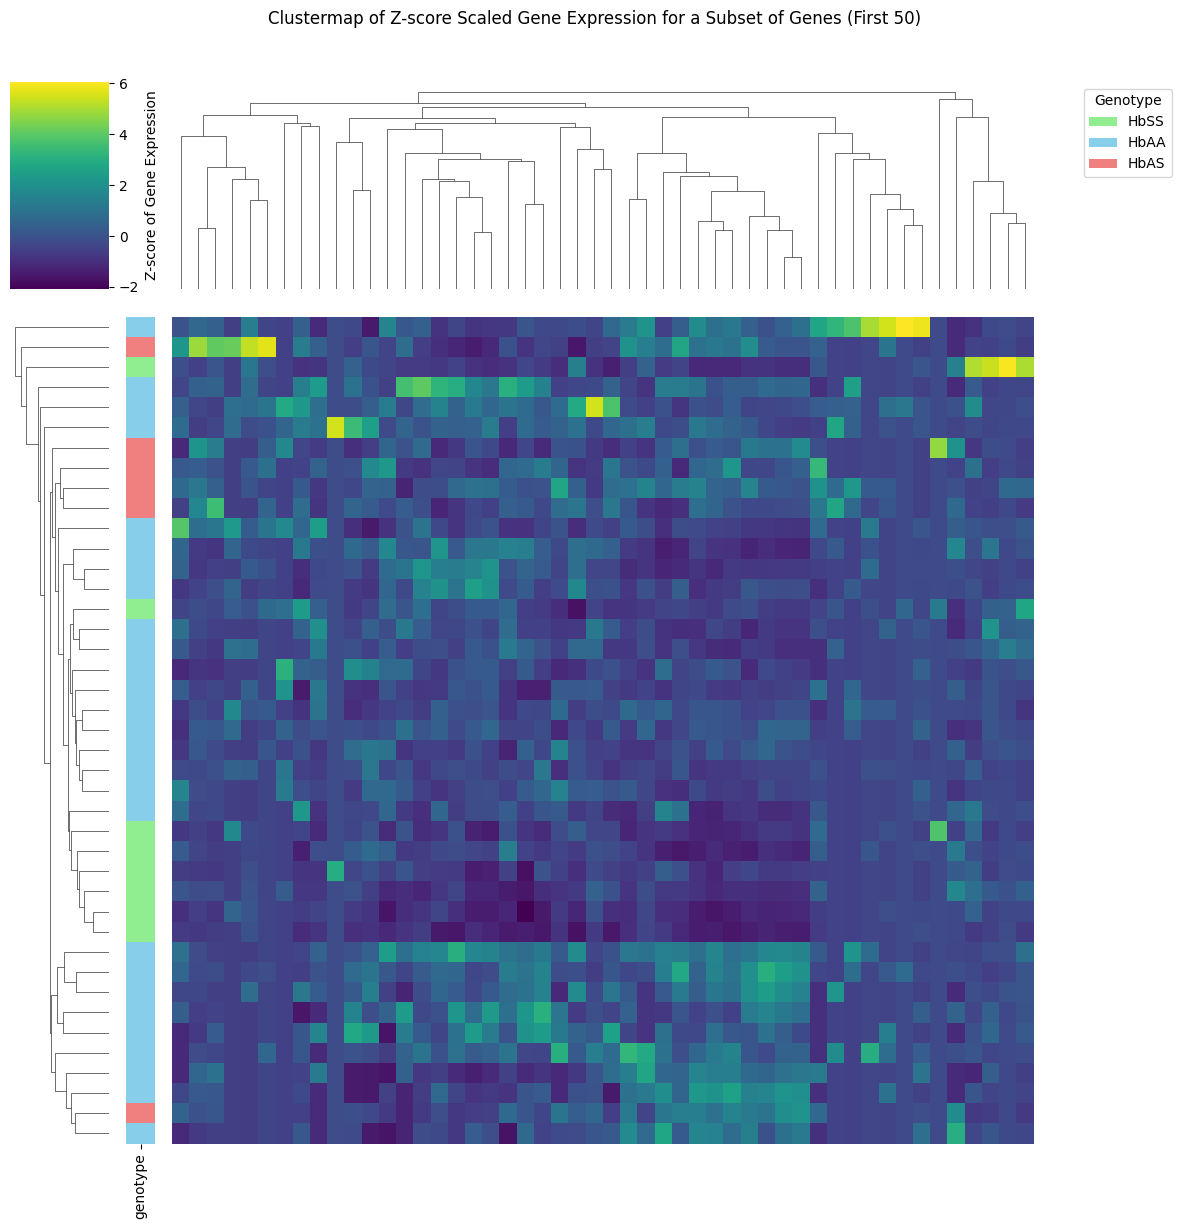

In [315]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colorblind-friendly colormap for genotype annotations
genotype_colors = {
    'HbAA': 'skyblue',
    'HbAS': 'lightcoral',
    'HbSS': 'lightgreen'
}

row_colors = sample_genotypes_heatmap.map(genotype_colors)

# Create the heatmap using seaborn.clustermap for better visualization
# clustermap automatically performs hierarchical clustering on rows and columns
g = sns.clustermap(
    subset_genes_for_heatmap, # Use the subset of scaled genes
    cmap='viridis', # Colorblind-friendly colormap
    standard_scale=None, # Already scaled with StandardScaler
    row_colors=row_colors, # Annotate rows (samples) by genotype
    figsize=(12, 12), # Adjust figure size
    cbar_kws={'label': 'Z-score of Gene Expression'},
    dendrogram_ratio=(.1, .2), # Adjust dendrogram size
    yticklabels=False, # Hide sample labels if too many
    xticklabels=False # Hide gene labels if too many
)

g.fig.suptitle('Clustermap of Z-score Scaled Gene Expression for a Subset of Genes (First 50)', y=1.02)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

# Add a custom legend for row_colors (genotypes)
for label in sample_genotypes_heatmap.unique():
    g.ax_col_dendrogram.bar(0, 0, color=genotype_colors[label], label=label, linewidth=0)
# Move the legend outside the plot area or to an empty space
g.ax_col_dendrogram.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()